In [254]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import re

# Load the dataset
file_path = '/Users/pintoza/Desktop/dev/data-science/walmart-proximity/data/interim/distance_sample.csv' 
data = pd.read_csv(file_path)

In [255]:
# Convert data in great_circle_distance to integers, for example 1 hour 23 min converts to 83
def convert_to_minutes(time_str):
    if pd.isna(time_str):
        return None
    # Using regex to find hours and minutes in the string
    hours = re.search(r'(\d+)\s*hour', time_str)
    minutes = re.search(r'(\d+)\s*min', time_str)

    total_minutes = 0
    if hours:
        total_minutes += int(hours.group(1)) * 60
    if minutes:
        total_minutes += int(minutes.group(1))
    return total_minutes

data['distance_in_time'] = data['distance_in_time'].apply(convert_to_minutes)

In [256]:
data

,origin,destination,distance_in_time,great_circle_distance,ruca
0,"34.049571,-87.552646","34.830588,-86.638833",104,74.988899,Rural
1,"34.049571,-87.552646","34.214321,-86.156222",119,80.670630,Rural
2,"34.049571,-87.552646","32.340084,-86.175233",151,142.451068,Rural
3,"34.049571,-87.552646","33.236132,-87.615214",71,56.318391,Rural
4,"34.049571,-87.552646","30.382341,-87.6857",307,253.500726,Rural
...,...,...,...,...,...
3978,"42.960098,-88.374455","43.570369,-90.886349",176,133.222990,Urban
3979,"42.960098,-88.374455","45.153637,-90.333444",216,180.075218,Urban
3980,"42.960098,-88.374455","44.91171,-91.931619",223,222.466075,Urban
3981,"42.083362,-109.418358","41.304004,-105.539403",222,207.222984,Rural


In [257]:
# Basic info and statistics
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3983 entries, 0 to 3982
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   origin                 3983 non-null   object 
 1   destination            3983 non-null   object 
 2   distance_in_time       3983 non-null   int64  
 3   great_circle_distance  3983 non-null   float64
 4   ruca                   3983 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 155.7+ KB
None
       distance_in_time  great_circle_distance
count       3983.000000            3983.000000
mean         204.117499             182.688586
std          140.966374             165.239480
min            6.000000               1.211319
25%          106.000000              81.418354
50%          178.000000             146.579748
75%          268.000000             232.419362
max         1430.000000            1894.411745


/opt/homebrew/Caskroom/miniconda/base/envs/walmart/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/walmart/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


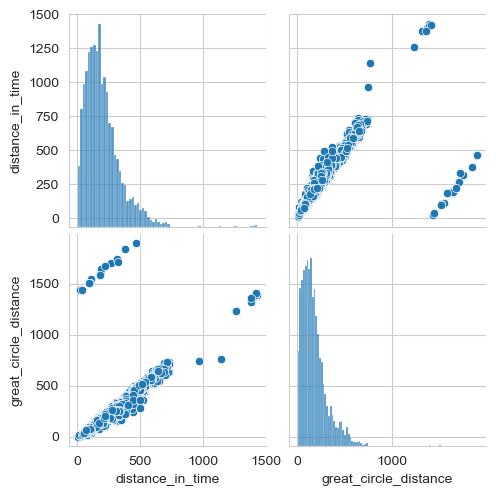

In [258]:
# Visualizing the relationships
sns.pairplot(data)
plt.show()

In [259]:
# Checking correlation between distance_in_time and great_circle_distance
data[['distance_in_time', 'great_circle_distance']].corr()

,distance_in_time,great_circle_distance
distance_in_time,1.000000,0.830821
great_circle_distance,0.830821,1.000000


In [260]:
outliers = data.sort_values(by=['great_circle_distance', 'distance_in_time'], ascending=[False, True])
outliers

,origin,destination,distance_in_time,great_circle_distance,ruca
3456,"31.71251,-106.328464","40.750422,-73.996328",466,1894.411745,Urban
2854,"31.03912,-104.824473","40.750422,-73.996328",379,1839.608052,Rural
3284,"30.886367,-102.890491","40.750422,-73.996328",317,1746.187658,Suburban
3671,"26.1948,-98.18362","40.750422,-73.996328",328,1709.251484,Urban
2983,"31.39736,-102.35014","40.750422,-73.996328",268,1700.706804,Suburban
...,...,...,...,...,...
3878,"38.625541,-77.271644","38.648662,-77.297171",11,2.109519,Urban
2702,"41.67964,-71.52178","41.663216,-71.555132",7,2.061721,Urban
3708,"26.1948,-98.18362","26.188966,-98.209983",7,1.683450,Urban
3471,"31.71251,-106.328464","31.728527,-106.34541",6,1.488842,Urban


In [261]:
filtered_data = data[(data['great_circle_distance'] <= 1250) | (data['distance_in_time'] >= 500)]

# Display the shape of the data before and after removing outliers
original_shape = data.shape
filtered_shape = filtered_data.shape

original_shape, filtered_shape

((3983, 5), (3968, 5))

In [262]:
x = (3968-3983)/3983
x = x * 100
observations_deleted = str(round(x,2)) + '%'
observations_deleted

'-0.38%'

In [263]:
data = filtered_data
data

,origin,destination,distance_in_time,great_circle_distance,ruca
0,"34.049571,-87.552646","34.830588,-86.638833",104,74.988899,Rural
1,"34.049571,-87.552646","34.214321,-86.156222",119,80.670630,Rural
2,"34.049571,-87.552646","32.340084,-86.175233",151,142.451068,Rural
3,"34.049571,-87.552646","33.236132,-87.615214",71,56.318391,Rural
4,"34.049571,-87.552646","30.382341,-87.6857",307,253.500726,Rural
...,...,...,...,...,...
3978,"42.960098,-88.374455","43.570369,-90.886349",176,133.222990,Urban
3979,"42.960098,-88.374455","45.153637,-90.333444",216,180.075218,Urban
3980,"42.960098,-88.374455","44.91171,-91.931619",223,222.466075,Urban
3981,"42.083362,-109.418358","41.304004,-105.539403",222,207.222984,Rural


In [264]:
data[['distance_in_time', 'great_circle_distance']].corr()

,distance_in_time,great_circle_distance
distance_in_time,1.000000,0.985385
great_circle_distance,0.985385,1.000000


In [265]:
data_encoded = pd.get_dummies(data, columns=['ruca'])

In [266]:
data_encoded

,origin,destination,distance_in_time,great_circle_distance,ruca_Rural,ruca_Suburban,ruca_Urban
0,"34.049571,-87.552646","34.830588,-86.638833",104,74.988899,True,False,False
1,"34.049571,-87.552646","34.214321,-86.156222",119,80.670630,True,False,False
2,"34.049571,-87.552646","32.340084,-86.175233",151,142.451068,True,False,False
3,"34.049571,-87.552646","33.236132,-87.615214",71,56.318391,True,False,False
4,"34.049571,-87.552646","30.382341,-87.6857",307,253.500726,True,False,False
...,...,...,...,...,...,...,...
3978,"42.960098,-88.374455","43.570369,-90.886349",176,133.222990,False,False,True
3979,"42.960098,-88.374455","45.153637,-90.333444",216,180.075218,False,False,True
3980,"42.960098,-88.374455","44.91171,-91.931619",223,222.466075,False,False,True
3981,"42.083362,-109.418358","41.304004,-105.539403",222,207.222984,True,False,False


/opt/homebrew/Caskroom/miniconda/base/envs/walmart/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/walmart/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/walmart/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/walmart/lib/python3.11/site-packages/seaborn/_st

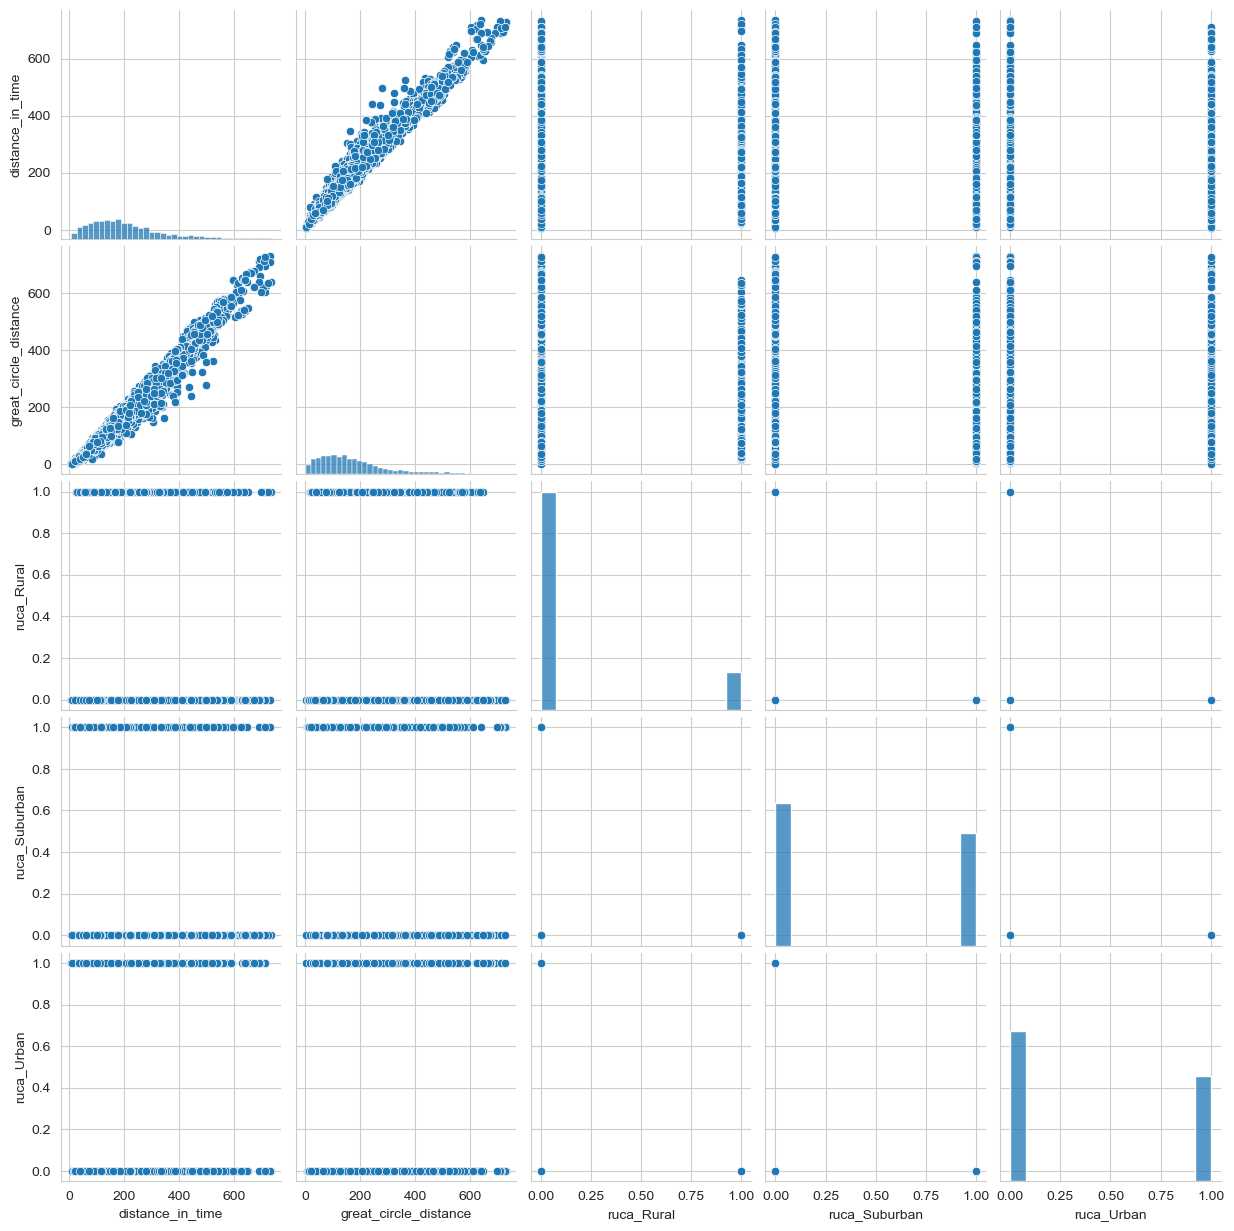

In [267]:
data_encoded = data_encoded[data_encoded['distance_in_time'] < 750]
# Visualizing the relationships
sns.pairplot(data_encoded)
plt.show()

In [268]:
data_encoded

,origin,destination,distance_in_time,great_circle_distance,ruca_Rural,ruca_Suburban,ruca_Urban
0,"34.049571,-87.552646","34.830588,-86.638833",104,74.988899,True,False,False
1,"34.049571,-87.552646","34.214321,-86.156222",119,80.670630,True,False,False
2,"34.049571,-87.552646","32.340084,-86.175233",151,142.451068,True,False,False
3,"34.049571,-87.552646","33.236132,-87.615214",71,56.318391,True,False,False
4,"34.049571,-87.552646","30.382341,-87.6857",307,253.500726,True,False,False
...,...,...,...,...,...,...,...
3978,"42.960098,-88.374455","43.570369,-90.886349",176,133.222990,False,False,True
3979,"42.960098,-88.374455","45.153637,-90.333444",216,180.075218,False,False,True
3980,"42.960098,-88.374455","44.91171,-91.931619",223,222.466075,False,False,True
3981,"42.083362,-109.418358","41.304004,-105.539403",222,207.222984,True,False,False


In [271]:
data = data_encoded[data_encoded['distance_in_time'] < 100]
data

,origin,destination,distance_in_time,great_circle_distance,ruca_Rural,ruca_Suburban,ruca_Urban
3,"34.049571,-87.552646","33.236132,-87.615214",71,56.318391,True,False,False
8,"34.049571,-87.552646","33.448237,-86.821089",70,59.097773,True,False,False
9,"34.049571,-87.552646","33.64555,-87.837726",44,32.355366,True,False,False
10,"34.049571,-87.552646","33.637739,-86.684404",78,57.377583,True,False,False
12,"34.049571,-87.552646","34.556786,-86.997067",75,47.261830,True,False,False
...,...,...,...,...,...,...,...
3966,"43.433273,-89.394518","43.458455,-89.772459",38,19.038502,False,True,False
3971,"43.853763,-91.246238","43.458455,-89.772459",87,78.571125,False,False,True
3973,"43.853763,-91.246238","43.570369,-90.886349",51,26.579158,False,False,True
3977,"42.960098,-88.374455","42.604773,-87.881585",60,35.034315,False,False,True


In [272]:
data[['distance_in_time', 'great_circle_distance']].corr()

,distance_in_time,great_circle_distance
distance_in_time,1.0000,0.9203
great_circle_distance,0.9203,1.0000


In [273]:
# Including great circle distance in the model
X = data[['great_circle_distance', 'ruca_Rural', 'ruca_Suburban', 'ruca_Urban']]
y = data['distance_in_time']

# Create the regression model
model = LinearRegression()
model.fit(X, y)

# Predict and calculate R-squared for the combined model
predictions = model.predict(X)
r_squared = r2_score(y, predictions)
print("R-squared with Great Circle Distance and RUCA classifications:", r_squared)

R-squared with Great Circle Distance and RUCA classifications: 0.8503317795956498


In [274]:
# Look at the coefficients for the RUCA classifications in your model
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# If you have a holdout test set or can perform cross-validation, do so here
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-validated R-squared scores:", cross_val_scores)

                       Coefficient
great_circle_distance     1.006000
ruca_Rural                1.180059
ruca_Suburban             0.828846
ruca_Urban               -2.008905
Cross-validated R-squared scores: [0.86494651 0.83311612 0.85250798 0.83952801 0.82895738]


In [276]:
from sklearn.linear_model import LinearRegression

X = data[['great_circle_distance', 'ruca_Rural', 'ruca_Suburban', 'ruca_Urban']]  # or any other predictors you want to include
y = data['distance_in_time']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [277]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [279]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 95.51530638393764
R-squared: 0.8430874456976731


In [280]:
# Coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Intercept
print(f"Intercept: {model.intercept_}")

                       Coefficient
great_circle_distance     1.004209
ruca_Rural                0.174183
ruca_Suburban             1.177049
ruca_Urban               -1.351231
Intercept: 17.3068349820822


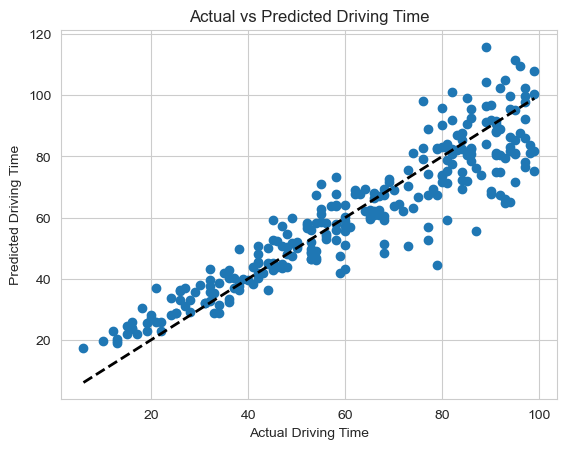

In [281]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Driving Time')
plt.ylabel('Predicted Driving Time')
plt.title('Actual vs Predicted Driving Time')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.show()

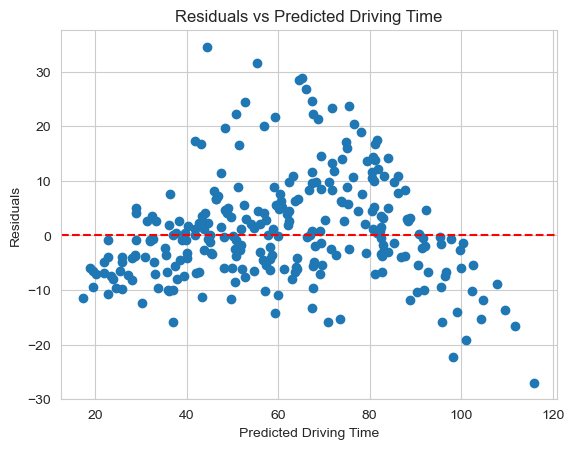

In [282]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Driving Time')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Driving Time')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

In [283]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-validated R-squared scores:", cross_val_scores)

Cross-validated R-squared scores: [0.86494651 0.83311612 0.85250798 0.83952801 0.82895738]
